In [ ]:
***Oceanic Nino Index (ONI) Data***

Source: https://psl.noaa.gov/data/correlation/oni.data

Time frame: January 1950 to July 2024

El Nino and La Nina episodes are defined as deviations from 30-year sea surface temperatures.
The NOAA figures are 3-month running means of sea surface temperatures in the Nino 3.4 region (in the middle of the Pacific Ocean).
El Nino and La Nina episodes have global effects and major coffee producers are relatively near to the Pacific Ocean (i.e. Brazil, Vietnam, Colombia, Honduras).

Visually the plots show that the ONI Index spend most of its time within a small range around zero but occassionally there are strong cycles in the positive or negative values.
These strong values (deep blues and reds on the heatmaps) represent significant climatic impacts and are likely to affect coffee crop yields.

**Cardinal SST deviation or absolute deviation?**
One question to investigate is whether the model should include the cardinal deviation from 30-year base mean or the absolute deviation.
Potentially, both extreme low and extreme high ONI values could negatively impact coffee crops, in which case putting the cardinal deviations in the model would not pickup true effects of ONI on coffee prices.
Cardinal deviations suggest that positive ONI values have an opposing effect on coffee prices to negative ONI values.

**Non-linearity**
If coffee crops are unaffected by small changes in ONI within a certain window, then the effect of ONI might be non-linear
Logarithms would have the problem of handling O ONI values, even if we only look at absolute ONI values
Squaring ONI values would emphasise larger values and have the same effect as taking the absolute in terms of attributing similar impacts to extreme positive and negative values

For this analysis, I will only compare ONI data to the levels of coffee prices, but the relationship with the differences in coffee prices will be considered at the model selection stage

There are other Nino areas with available SST series. There is a high degree of correlation between them. For simplicity, I will only consider the Nino 3.4 region.

In [ ]:
Heatmap of ONI Index with Years on Horizontal Axis

   Year  January  February  March  April   May  June  July  August  September  \
0  1950    -1.53     -1.34  -1.16  -1.18 -1.07 -0.85 -0.54   -0.42      -0.39   
1  1951    -0.82     -0.54  -0.17   0.18  0.36  0.58  0.70    0.89       0.99   
2  1952     0.53      0.37   0.34   0.29  0.20  0.00 -0.08    0.00       0.15   
3  1953     0.40      0.60   0.63   0.66  0.75  0.77  0.75    0.73       0.78   
4  1954     0.76      0.47  -0.05  -0.41 -0.54 -0.50 -0.64   -0.84      -0.90   

   October  November  December  
0    -0.44     -0.60     -0.80  
1     1.15      1.04      0.81  
2     0.10      0.04      0.15  
3     0.84      0.84      0.81  
4    -0.77     -0.73     -0.66  


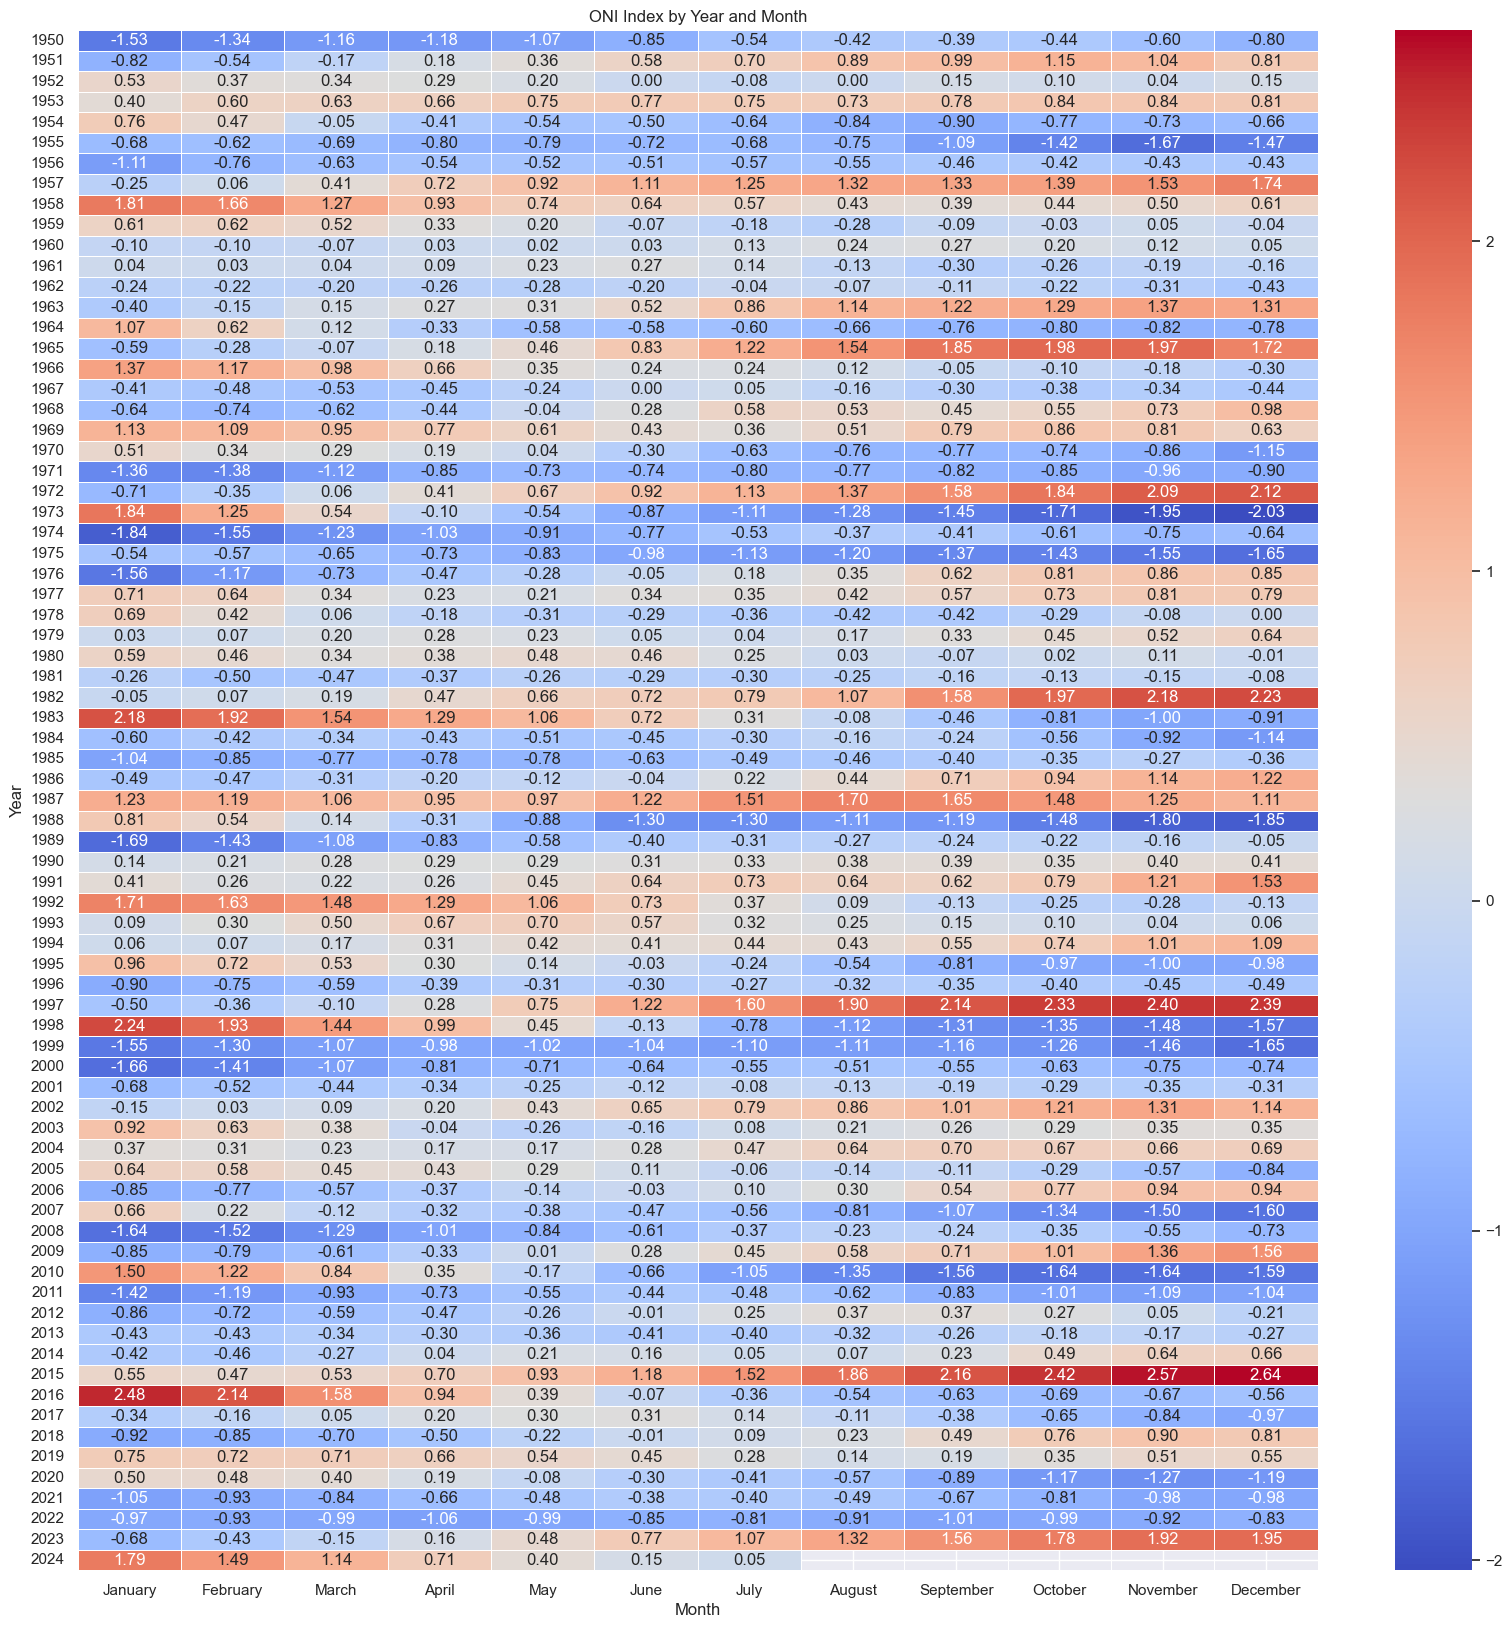

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load ONI index data
oni_index = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Monthly ONI Index.csv")
print(oni_index.head())

# Ensure that years are not plotted as an ONI value
oni_index.set_index("Year", inplace=True)

# Create heatmap
sns.set_theme()
plt.figure(figsize=(20, 20))
heatmap_plot = sns.heatmap(oni_index, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('ONI Index by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Save plot as png
fig = heatmap_plot.get_figure()
fig.savefig('ONI Index Heatmap - Vertical Years.png')


In [ ]:
Heatmap of ONI Index with Years on the Horizontal Axis

   Year  January  February  March  April   May  June  July  August  September  \
0  1950    -1.53     -1.34  -1.16  -1.18 -1.07 -0.85 -0.54   -0.42      -0.39   
1  1951    -0.82     -0.54  -0.17   0.18  0.36  0.58  0.70    0.89       0.99   
2  1952     0.53      0.37   0.34   0.29  0.20  0.00 -0.08    0.00       0.15   
3  1953     0.40      0.60   0.63   0.66  0.75  0.77  0.75    0.73       0.78   
4  1954     0.76      0.47  -0.05  -0.41 -0.54 -0.50 -0.64   -0.84      -0.90   

   October  November  December  
0    -0.44     -0.60     -0.80  
1     1.15      1.04      0.81  
2     0.10      0.04      0.15  
3     0.84      0.84      0.81  
4    -0.77     -0.73     -0.66  
   Year    Month   ONI
0  1995  January  0.96
1  1996  January -0.90
2  1997  January -0.50
3  1998  January  2.24
4  1999  January -1.55
Summary Statistics for ONI Data
              Year         ONI
count   360.000000  355.000000
mean   2009.500000   -0.063690
std       8.667488    0.888489
min    1995.000000   

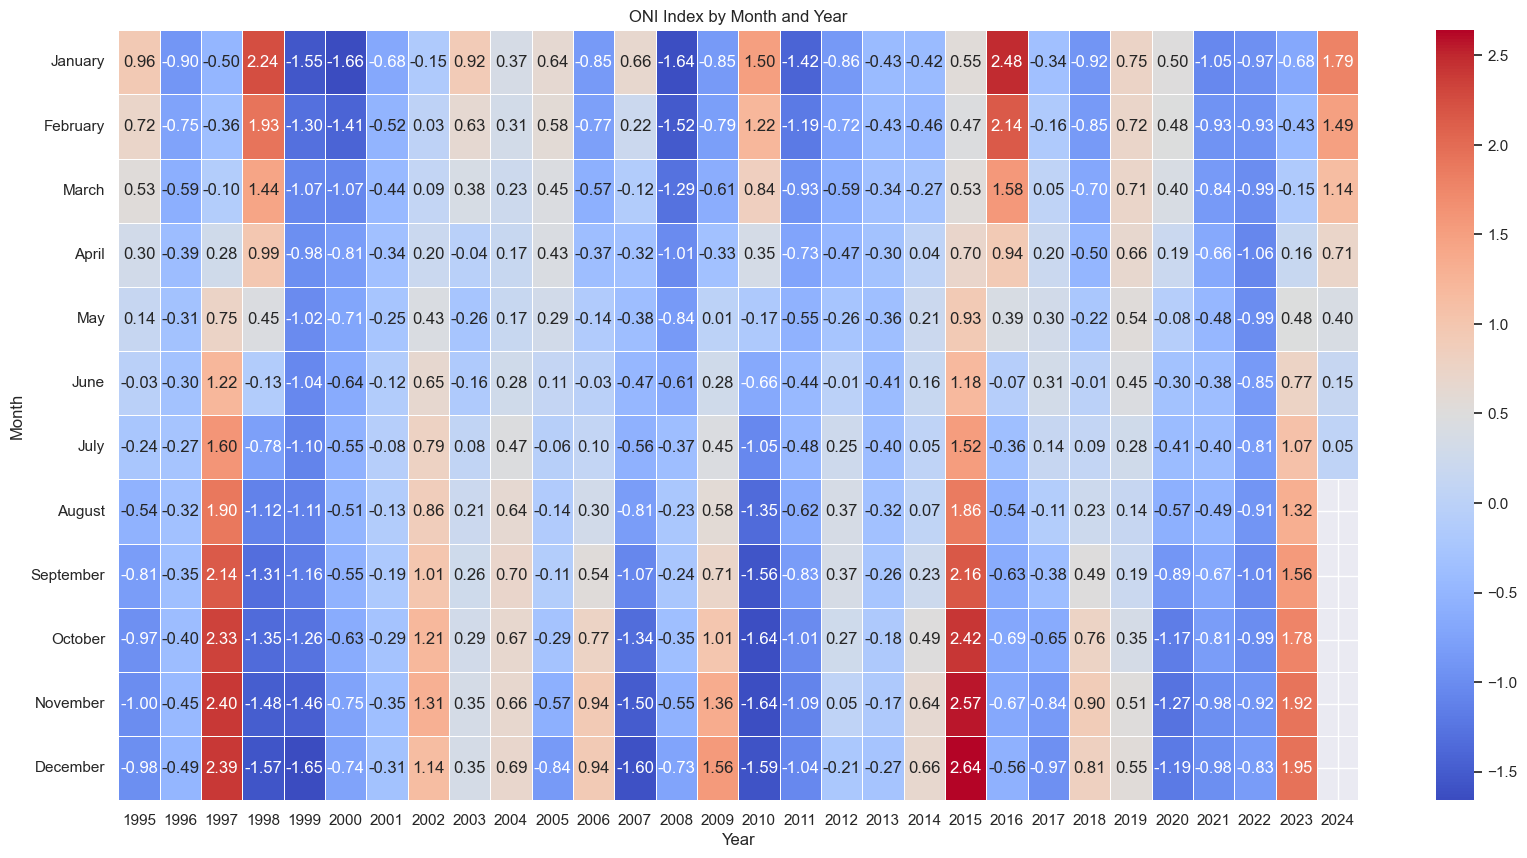

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load ONI index data
oni_index = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Monthly ONI Index.csv")
print(oni_index.head())

# Only plot 30 most recent years to save space on heatmap
oni_index = oni_index.tail(30)

# Convert the dataset from wide to long format
oni_long = oni_index.melt(id_vars="Year", var_name="Month", value_name="ONI")
print(oni_long.head())

# Summary statistics for ONI data
summary = oni_long.describe()
print('Summary Statistics for ONI Data')
print(summary)

# Ensure plot follows the order of the months
month_order = [
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 
    'October', 'November', 'December'
]
oni_long['Month'] = pd.Categorical(oni_long['Month'], categories=month_order, ordered=True)

oni_pivot = oni_long.pivot(index="Month", columns="Year", values="ONI")
print(oni_pivot.head())


# Create  heatmap
sns.set_theme()
plt.figure(figsize=(20, 10))
heatmap_plot = sns.heatmap(oni_pivot, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('ONI Index by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

fig = heatmap_plot.get_figure()
fig.savefig('ONI Index Heatmap - Horizontal Years.png')

In [ ]:
Line Plot of ONI Index Data

   Year  January  February  March  April   May  June  July  August  September  \
0  1950    -1.53     -1.34  -1.16  -1.18 -1.07 -0.85 -0.54   -0.42      -0.39   
1  1951    -0.82     -0.54  -0.17   0.18  0.36  0.58  0.70    0.89       0.99   
2  1952     0.53      0.37   0.34   0.29  0.20  0.00 -0.08    0.00       0.15   
3  1953     0.40      0.60   0.63   0.66  0.75  0.77  0.75    0.73       0.78   
4  1954     0.76      0.47  -0.05  -0.41 -0.54 -0.50 -0.64   -0.84      -0.90   

   October  November  December  
0    -0.44     -0.60     -0.80  
1     1.15      1.04      0.81  
2     0.10      0.04      0.15  
3     0.84      0.84      0.81  
4    -0.77     -0.73     -0.66  
   Year     Month   ONI
0  1950   January -1.53
1  1950  February -1.34
2  1950     March -1.16
3  1950     April -1.18
4  1950       May -1.07


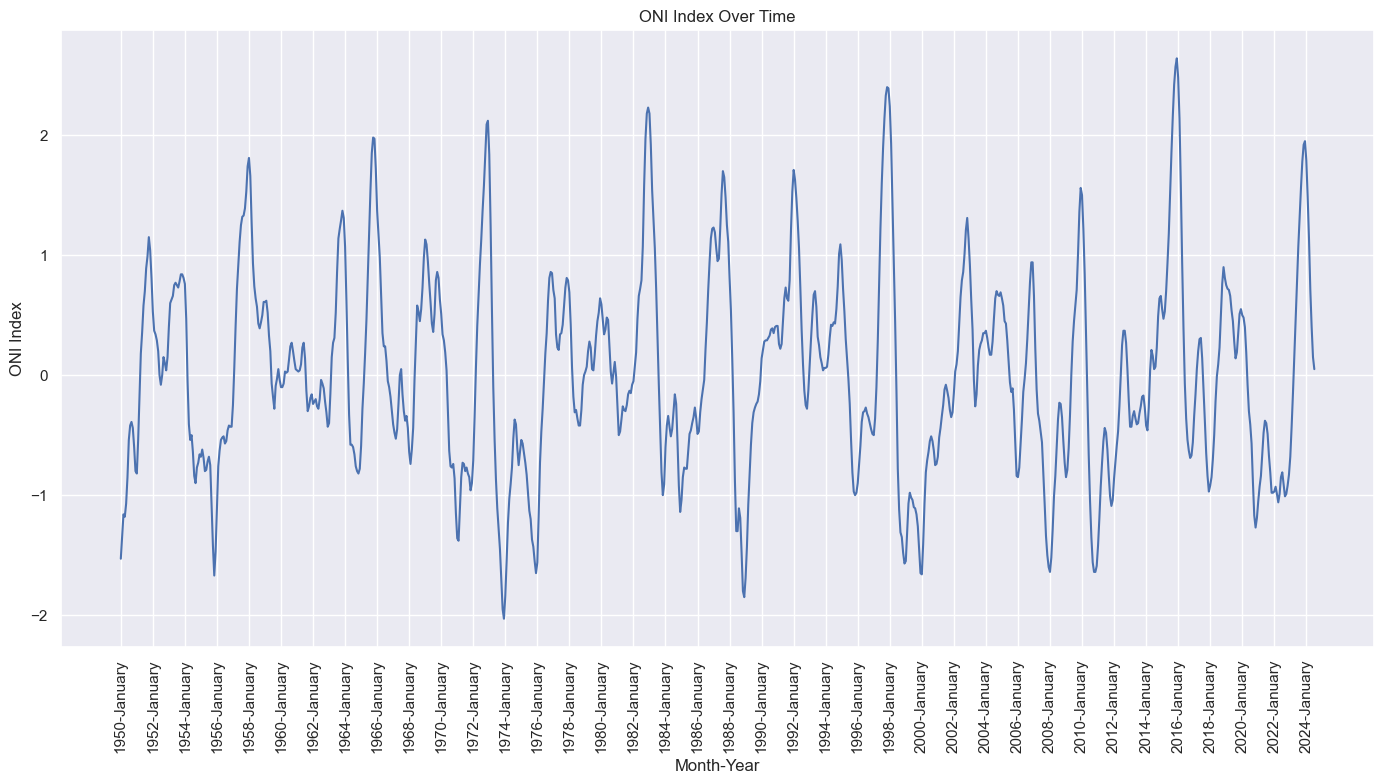

In [7]:
# Scatterplot of ONI data (relegated in favour of a lineplot which better displays the continuous variable)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load ONI index data
oni_index = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Monthly ONI Index.csv")
print(oni_index.head())

oni_long = oni_index.melt(id_vars="Year", var_name="Month", value_name="ONI")

# Define the correct order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 
    'October', 'November', 'December'
]

# Convert 'Month' to a categorical type with the specified order
oni_long['Month'] = pd.Categorical(oni_long['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by Year and Month
oni_long_sorted = oni_long.sort_values(by=['Year', 'Month']).reset_index(drop=True)
print(oni_long_sorted.head())


# Create a new column for the month-year combination for plotting
# N.B. Convert categorical month value to string before concatenation
oni_long_sorted['Month-Year'] = oni_long_sorted['Year'].astype(str) + '-' + oni_long_sorted['Month'].astype(str)

# Make it big enough
plt.figure(figsize=(14, 8))
sns.set_theme()

# Vertical x-axis labels every two years to ensure readability
num_labels = len(oni_long_sorted['Month-Year'])
plt.xticks(ticks=range(0, num_labels, 24), labels=oni_long_sorted['Month-Year'][::24], rotation=90)

# Plot each month-year with color based on ONI values
lineplot = sns.lineplot(x='Month-Year', y='ONI', data=oni_long_sorted)
plt.title('ONI Index Over Time')
plt.xlabel('Month-Year')
plt.ylabel('ONI Index')
plt.tight_layout()
plt.show()

lineplot.figure.savefig('ONI Index Lineplot.png')

In [ ]:
Correlation between the ONI Index and Coffee Prices

In [11]:
import pandas as pd

# Load ONI index data
oni_index = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Monthly ONI Index.csv")
# Transform from wide to long form
oni_long = oni_index.melt(id_vars="Year", var_name="Month", value_name="ONI")
# Convert 'Month' to a categorical type with the specified order
month_order = [
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 
    'October', 'November', 'December'
]
oni_long['Month'] = pd.Categorical(oni_long['Month'], categories=month_order, ordered=True)
# Sort by year, month
oni_long_sorted = oni_long.sort_values(by=['Year', 'Month']).reset_index(drop=True)
print('ONI Index')
print(oni_long_sorted.head())
print(oni_long_sorted.tail(7))

# Load coffee price data
robusta_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFROBUSDM.csv")
other_mild_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFOTMUSDM.csv")
print('Robusta Prices')
print(robusta_prices.head())
print(robusta_prices.tail())
print('Other Mild Prices')
print(other_mild_prices.head())
print(other_mild_prices.tail())

# Trim ONI data to coffee price series start date (Jan 1990)
oni_trimmed = oni_long_sorted.tail(len(oni_long_sorted) - 480)
print(oni_trimmed.head())
print(oni_trimmed.tail())

# Trim coffee price series to end of ONI series (Jul 2024)
robusta_trimmed = robusta_prices.head(len(robusta_prices) - 2)
other_mild_trimmed = other_mild_prices.head(len(other_mild_prices) - 2)
print(robusta_trimmed.tail())
print(other_mild_trimmed.tail())
# Remove NaNs from the end of the ONI data
oni_trimmed = oni_trimmed.head(len(oni_trimmed)-5)
print(oni_trimmed.tail())

# Check uniform series lengths
print(len(oni_trimmed), len(robusta_trimmed), len(other_mild_trimmed))

# Create dataframe with all three series
# Create matching DATE column in ONI data for join
def month_to_number(month):
    # Dictionary to map month names to their corresponding numbers
    months = {
        'January': '01', 'February': '02', 'March': '03', 'April': '04',
        'May': '05', 'June': '06', 'July': '07', 'August': '08',
        'September': '09', 'October': '10', 'November': '11', 'December': '12'
    }
    # Return the corresponding string for the month, or None if the month is not found
    return months.get(month, None)
    
# Creating a DATE column inside an iterrows loop did not work because iterrows changes are not reflected in the original dataframe
oni_trimmed['DATE'] = oni_trimmed.apply(lambda row: str(row['Year']) + '-' + month_to_number(row['Month']) + '-01', axis=1)

robus_oni = pd.merge(robusta_trimmed, oni_trimmed, on='DATE', how='inner')
corr_df = pd.merge(robus_oni, other_mild_trimmed, on='DATE', how='inner')
# Include squared ONI values
corr_df['squared_oni'] = corr_df['ONI'] * corr_df['ONI']
print('corr_df: heads and tails')
print(corr_df.head())
print(corr_df.tail())

# Now all series start in January 1990 and end in July 2024

ONI Index
   Year     Month   ONI
0  1950   January -1.53
1  1950  February -1.34
2  1950     March -1.16
3  1950     April -1.18
4  1950       May -1.07
     Year      Month   ONI
893  2024       June  0.15
894  2024       July  0.05
895  2024     August   NaN
896  2024  September   NaN
897  2024    October   NaN
898  2024   November   NaN
899  2024   December   NaN
Robusta Prices
         DATE  PCOFFROBUSDM
0  1990-01-01     50.520000
1  1990-02-01     51.299999
2  1990-03-01     57.680000
3  1990-04-01     57.389999
4  1990-05-01     55.029999
           DATE  PCOFFROBUSDM
412  2024-05-01    186.457391
413  2024-06-01    204.327000
414  2024-07-01    214.541304
415  2024-08-01    214.695455
416  2024-09-01    242.461905
Other Mild Prices
         DATE  PCOFFOTMUSDM
0  1990-01-01     75.829987
1  1990-02-01     84.010010
2  1990-03-01     93.959991
3  1990-04-01     93.730011
4  1990-05-01     92.019989
           DATE  PCOFFOTMUSDM
412  2024-05-01    232.342609
413  2024-06-01    24

In [13]:
# Pearson's Rank Correlation Coefficient
from scipy.stats import pearsonr

print('Robusta Correlations')
robusta_oni_corr, robusta_oni_p_value = pearsonr(corr_df['ONI'], corr_df['PCOFFROBUSDM'])
robusta_oni_squared_corr, robusta_oni_squared_p_value = pearsonr(corr_df['squared_oni'], corr_df['PCOFFROBUSDM'])
print(f'Cardinal ONI Pearson correlation: {robusta_oni_corr} P-value: {robusta_oni_p_value}')
print(f'Squared ONI Pearson correlation: {robusta_oni_squared_corr} P-value: {robusta_oni_squared_p_value}')

print('\nOther Mild Correlations')
other_mild_oni_corr, other_mild_oni_p_value = pearsonr(corr_df['ONI'], corr_df['PCOFFOTMUSDM'])
other_mild_oni_squared_corr, other_mild_oni_squared_p_value = pearsonr(corr_df['squared_oni'], corr_df['PCOFFOTMUSDM'])
print(f'Cardinal ONI Pearson correlation: {other_mild_oni_corr} P-value: {other_mild_oni_p_value}')
print(f'Squared ONI Pearson correlation: {other_mild_oni_squared_corr} P-value: {other_mild_oni_squared_p_value}')

'''
Squared ONI values show a higher degree of correlation with both robusta and other mild prices.
The correlation between Other Mild prices and both cardinal and squared ONI values is statistically significant at the 1% level.
'''

Robusta Correlations
Cardinal ONI Pearson correlation: -0.05824405451946923 P-value: 0.2364336200838278
Squared ONI Pearson correlation: 0.09345102483367367 P-value: 0.057149665631961985

Other Mild Correlations
Cardinal ONI Pearson correlation: -0.12745240005448571 P-value: 0.009344693157332839
Squared ONI Pearson correlation: 0.17424880886275726 P-value: 0.0003620135621050722


'\nSquared ONI values show a higher degree of correlation with both robusta and other mild prices.\nThe correlation between Other Mild prices and both cardinal and squared ONI values is statistically significant at the 1% level.\n'

In [15]:
from statsmodels.tsa.stattools import ccf
cross_corr = ccf(corr_df['PCOFFROBUSDM'], corr_df['ONI'])
print('ONI-Robusta Price Correlation')
print(cross_corr)

print('Squared ONI-Robusta Price Correlation')
cross_corr = ccf(corr_df['PCOFFROBUSDM'], corr_df['squared_oni'])
print(cross_corr)

ONI-Robusta Price Correlation
[-0.05824405 -0.0517163  -0.04260694 -0.03320612 -0.02524177 -0.02125777
 -0.02006041 -0.02166574 -0.02463287 -0.02714534 -0.02852967 -0.02829033
 -0.02696352 -0.02433003 -0.0210523  -0.01833853 -0.01632538 -0.01545912
 -0.01614077 -0.01818041 -0.02151834 -0.02504799 -0.02736382 -0.02765074
 -0.02635442 -0.02362451 -0.01738318 -0.00649607  0.00786441  0.02214496
  0.03474167  0.04557334  0.0554535   0.06327673  0.06643863  0.06455433
  0.05902536  0.0511906   0.04143416  0.02985105  0.01875299  0.00997788
  0.00479354  0.00535474  0.01275427  0.02556365  0.04029707  0.05346056
  0.06438252  0.07567997  0.08728124  0.09623472  0.10022626  0.09989556
  0.09720916  0.09301414  0.08641827  0.07891968  0.07313776  0.0697983
  0.06745113  0.0627327   0.05670467  0.051227    0.04601344  0.04193436
  0.03900607  0.0359995   0.02960991  0.0177392   0.00372659 -0.01056633
 -0.02467035 -0.03996173 -0.05577208 -0.06922045 -0.07833065 -0.0830312
 -0.08313493 -0.0791630

In [17]:
from statsmodels.tsa.stattools import grangercausalitytests
# Coffee is normally harvested once a year so let's investigate monthly lags within a harvest cycle
max_lag = 12
print('*Robusta Lag Granger Causality Tests*')
print('Cardinal ONI')
# Test of whether the second column Granger causes the first column
grangercausalitytests(corr_df[['PCOFFROBUSDM', 'ONI']], maxlag=max_lag)
print('Squared ONI')
grangercausalitytests(corr_df[['PCOFFROBUSDM', 'squared_oni']], maxlag=max_lag)

*Robusta Lag Granger Causality Tests*
Cardinal ONI

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6733  , p=0.4124  , df_denom=411, df_num=1
ssr based chi2 test:   chi2=0.6782  , p=0.4102  , df=1
likelihood ratio test: chi2=0.6777  , p=0.4104  , df=1
parameter F test:         F=0.6733  , p=0.4124  , df_denom=411, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7032  , p=0.1834  , df_denom=408, df_num=2
ssr based chi2 test:   chi2=3.4482  , p=0.1783  , df=2
likelihood ratio test: chi2=3.4339  , p=0.1796  , df=2
parameter F test:         F=1.7032  , p=0.1834  , df_denom=408, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2814  , p=0.2803  , df_denom=405, df_num=3
ssr based chi2 test:   chi2=3.9108  , p=0.2713  , df=3
likelihood ratio test: chi2=3.8923  , p=0.2733  , df=3
parameter F test:         F=1.2814  , p=0.2803  , df_denom=405, df_num=3

Granger Causality
number of lags (no zero)

{1: ({'ssr_ftest': (0.03681426651558301, 0.8479384493803792, 411.0, 1),
   'ssr_chi2test': (0.037082983789419384, 0.8472961913187513, 1),
   'lrtest': (0.03708132308247514, 0.8472995686083845, 1),
   'params_ftest': (0.036814266515606785, 0.8479384493803792, 411.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.2376148123929647, 0.1080207484201716, 408.0, 2),
   'ssr_chi2test': (4.530073125089678, 0.10382623831990359, 2),
   'lrtest': (4.505408811481175, 0.10511456738165592, 2),
   'params_ftest': (2.237614812392943, 0.10802074842017967, 408.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4688502866885536, 0.22248655982531446, 405.0, 3),
   'ssr_chi2test': (4.4827134675235865, 0.2138373991216437, 3),
   'lrtest': (4.458502131952628, 0.2160218047275076, 3),
   'params_ftest': (1.4688502866885609, 0.22248655982530577, 405.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [19]:
max_lag = 12
print('*Other Mild Lag Granger Causality Tests*')
print('Cardinal ONI')
grangercausalitytests(corr_df[['PCOFFOTMUSDM', 'ONI']], maxlag=max_lag)
print('Squared ONI')
grangercausalitytests(corr_df[['PCOFFOTMUSDM', 'squared_oni']], maxlag=max_lag)

*Other Mild Lag Granger Causality Tests*
Cardinal ONI

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5573  , p=0.2128  , df_denom=411, df_num=1
ssr based chi2 test:   chi2=1.5687  , p=0.2104  , df=1
likelihood ratio test: chi2=1.5657  , p=0.2108  , df=1
parameter F test:         F=1.5573  , p=0.2128  , df_denom=411, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2598  , p=0.2848  , df_denom=408, df_num=2
ssr based chi2 test:   chi2=2.5504  , p=0.2794  , df=2
likelihood ratio test: chi2=2.5426  , p=0.2805  , df=2
parameter F test:         F=1.2598  , p=0.2848  , df_denom=408, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8900  , p=0.4463  , df_denom=405, df_num=3
ssr based chi2 test:   chi2=2.7161  , p=0.4375  , df=3
likelihood ratio test: chi2=2.7072  , p=0.4390  , df=3
parameter F test:         F=0.8900  , p=0.4463  , df_denom=405, df_num=3

Granger Causality
number of lags (no ze

{1: ({'ssr_ftest': (0.05613907823039537, 0.8128238189411555, 411.0, 1),
   'ssr_chi2test': (0.05654885252404789, 0.8120361982442826, 1),
   'lrtest': (0.05654499083129849, 0.8120424962679855, 1),
   'params_ftest': (0.05613907823037977, 0.8128238189411555, 411.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2278346308815518, 0.7963571614179541, 408.0, 2),
   'ssr_chi2test': (0.46125344389255335, 0.7940358068636107, 2),
   'lrtest': (0.4609960631855756, 0.7941379981876566, 2),
   'params_ftest': (0.22783463088157488, 0.7963571614179361, 408.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3458227614991076, 0.7921986105330434, 405.0, 3),
   'ssr_chi2test': (1.055399835093573, 0.7878501545197651, 3),
   'lrtest': (1.0540503566576263, 0.7881764529582328, 3),
   'params_ftest': (0.3458227614990601, 0.7921986105330654, 405.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [21]:
from statsmodels.tsa.api import VAR
model = VAR(corr_df[['PCOFFROBUSDM', 'ONI']])
result = model.fit(maxlags=12, ic='aic')
print('Robusta-ONI VAR with AIC Lags')
print(result.summary())

Robusta-ONI VAR with AIC Lags
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 20, Oct, 2024
Time:                     20:02:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.33862
Nobs:                     404.000    HQIC:                  -1.61387
Log likelihood:          -738.069    FPE:                   0.166298
AIC:                     -1.79422    Det(Omega_mle):        0.148865
--------------------------------------------------------------------
Results for equation PCOFFROBUSDM
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    1.117798         0.843618            1.325           0.185
L1.PCOFFROBUSDM          1.263881         0.051395           24.592           0.000
L1.ONI     

In [23]:
model = VAR(corr_df[['PCOFFROBUSDM', 'squared_oni']])
result = model.fit(maxlags=12, ic='aic')
print('Robusta-Squared ONI VAR with AIC Lags')
print(result.summary())
# The results of the VAR model between robusta prices and squared ONI values suggest that 7 lags are most appropriate according to the Akaike Information Criterion

Robusta-Squared ONI VAR with AIC Lags
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 20, Oct, 2024
Time:                     20:02:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.139982
Nobs:                     408.000    HQIC:                 -0.318217
Log likelihood:          -1039.13    FPE:                   0.647354
AIC:                    -0.434928    Det(Omega_mle):        0.602257
--------------------------------------------------------------------
Results for equation PCOFFROBUSDM
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.933836         0.807532            1.156           0.248
L1.PCOFFROBUSDM         1.266470         0.050193           25.232           0.000
L1.squa

In [35]:
# Stationarity Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF stationarity test
# The null hypothesis is that there is a unit root. The alternative hypothesis that there is no unit root (stationary).
print('\n***ADF stationarity test***')
print('ADF (constant only) test of ONI')
result = adfuller(corr_df['ONI'], regression = "c")
print(f'ADF (constant-only) test statistic: {result[0]} P-value: {result[1]}')
print(result)
result = kpss(x = corr_df['ONI'].dropna(), regression = "c")
print(f'KPSS (constant-only) test statistic: {result[0]} P-value: {result[1]}')
print(result)

print('The ADF and KPSS tests provide a strong level of evidence to suggest that ONI is stationary.')
print('It is important to remember that ONI is already detrended as the SST anomaly compared to 30-year baseline averages.')


***ADF stationarity test***
ADF (constant only) test of ONI
ADF (constant-only) test statistic: -4.3148403903920425 P-value: 0.00041864832449977246
(-4.3148403903920425, 0.00041864832449977246, 17, 397, {'1%': -3.4469295619737665, '5%': -2.8688478565083417, '10%': -2.570662885558566}, -972.4791075110415)
KPSS (constant-only) test statistic: 0.10365832277519675 P-value: 0.1
(0.10365832277519675, 0.1, 11, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
The ADF and KPSS tests provide a strong level of evidence to suggest that ONI is stationary.
It is important to remember that ONI is already detrended as the SST anomaly compared to 30-year baseline averages.


C:\Users\marle\AppData\Local\Temp\ipykernel_30516\2153495726.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x = corr_df['ONI'].dropna(), regression = "c")


   Year  January  February  March  April   May  June  July  August  September  \
0  1950    -1.53     -1.34  -1.16  -1.18 -1.07 -0.85 -0.54   -0.42      -0.39   
1  1951    -0.82     -0.54  -0.17   0.18  0.36  0.58  0.70    0.89       0.99   
2  1952     0.53      0.37   0.34   0.29  0.20  0.00 -0.08    0.00       0.15   
3  1953     0.40      0.60   0.63   0.66  0.75  0.77  0.75    0.73       0.78   
4  1954     0.76      0.47  -0.05  -0.41 -0.54 -0.50 -0.64   -0.84      -0.90   

   October  November  December  
0    -0.44     -0.60     -0.80  
1     1.15      1.04      0.81  
2     0.10      0.04      0.15  
3     0.84      0.84      0.81  
4    -0.77     -0.73     -0.66  
   Year     Month   ONI
0  1950   January -1.53
1  1950  February -1.34
2  1950     March -1.16
3  1950     April -1.18
4  1950       May -1.07


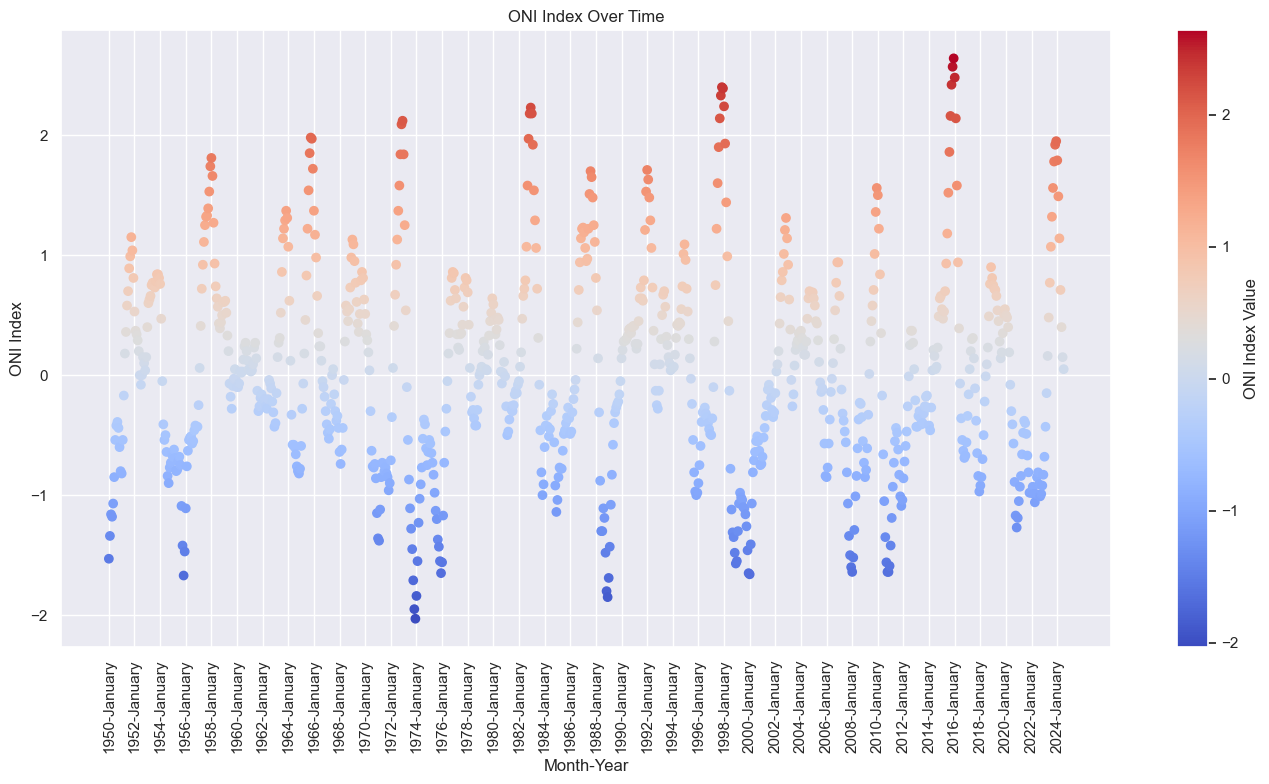

In [33]:
# Scatterplot of ONI data (relegated in favour of a lineplot which better displays the continuous variable)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load ONI index data
oni_index = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Monthly ONI Index.csv")
print(oni_index.head())

oni_long = oni_index.melt(id_vars="Year", var_name="Month", value_name="ONI")

# Define the correct order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 
    'October', 'November', 'December'
]

# Convert 'Month' to a categorical type with the specified order
oni_long['Month'] = pd.Categorical(oni_long['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by Year and Month
oni_long_sorted = oni_long.sort_values(by=['Year', 'Month']).reset_index(drop=True)
print(oni_long_sorted.head())


# Create a new column for the month-year combination for plotting
# N.B. Convert categorical month value to string before concatenation
oni_long_sorted['Month-Year'] = oni_long_sorted['Year'].astype(str) + '-' + oni_long_sorted['Month'].astype(str)

# Make it big enough
plt.figure(figsize=(14, 8))
sns.set_theme()

# Vertical x-axis labels every two years to ensure readability
num_labels = len(oni_long_sorted['Month-Year'])
plt.xticks(ticks=range(0, num_labels, 24), labels=oni_long_sorted['Month-Year'][::24], rotation=90)

# Define an appropriate colourmap and normalise the extremes to the data
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(oni_long_sorted['ONI'].min(), oni_long_sorted['ONI'].max())

# Plot each month-year with color based on ONI values
scatter = plt.scatter(oni_long_sorted['Month-Year'], oni_long_sorted['ONI'], 
                      c=oni_long_sorted['ONI'], cmap=cmap, norm=norm, 
                      marker='o')
# Add colorbar (after scatter has been defined)
cbar = plt.colorbar(scatter, label='ONI Index Value')
plt.title('ONI Index Over Time')
plt.xlabel('Month-Year')
plt.ylabel('ONI Index')
plt.tight_layout()
plt.show()

fig = scatter.get_figure()
fig.savefig('ONI Index Scatterplot.png')